<a href="https://colab.research.google.com/github/mariammur/CS4410/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
iris = load_iris()
print(iris.DESCR)
X=iris.data
y= iris.target

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10,scoring= 'accuracy')
print (scores)


[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [5]:
prev_score = scores.mean()
print (scores.mean())

0.9666666666666668


In [6]:
krange= range(1,31)
kscores= [] 
for k in krange:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, y, cv=10,scoring= 'accuracy')
  kscores.append(scores.mean())
print (kscores)


[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

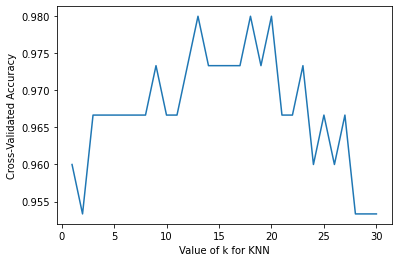

In [7]:
plt.plot(krange, kscores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [19]:
from sklearn.model_selection import GridSearchCV


In [22]:
param_grid = {'n_neighbors':np.arange(1,31)}
print (param_grid)


{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])}


In [14]:
grid= GridSearchCV(knn,param_grid,cv=10, scoring='accuracy')


In [15]:
grid.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')

Text(0, 0.5, 'Cross-Validated Accuracy')

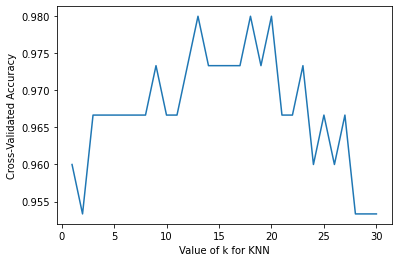

In [21]:
plt.plot(krange, kscores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [28]:
k = grid.best_params_

knn_final = KNeighborsClassifier(n_neighbors = k['n_neighbors'])
knn_final.fit(X, y)
fscore = cross_val_score(knn_final, X,y,cv=10).mean()

print(fscore)


0.9800000000000001


In [33]:
print (grid.best_params_)

{'n_neighbors': 13}


In [34]:
print (grid.best_score_)

0.9800000000000001


In [35]:
print (grid.best_estimator_)

KNeighborsClassifier(n_neighbors=13)
